##Tugas 1 Komputasi Statistika

Kelompok 10:
1. Christi Novelina Panggabean	(2106725021)
2. Mussarofah Kurnia	(2106652543)
3. Najwa Salsabila Hakim	(2106726812)
4. Titania Puteri Samudera	(2106654246)
5. Zahrah Aulia Putri	(2106724896)


###Import

In [20]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from spacy.lang.en.stop_words import STOP_WORDS as stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
pd.set_option("display.max_colwidth", 200)

In [2]:
# Load Data
from sklearn.datasets import fetch_20newsgroups

In [3]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

# Look at the dataset
documents[:3]

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

In [4]:
print("Terdapat {} dokumen yang dikelompokkan menjadi 20 kelompok berita, yaitu {}".format(len(documents), dataset.target_names))

Terdapat 11314 dokumen yang dikelompokkan menjadi 20 kelompok berita, yaitu ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


###Preprocessing

In [5]:
# ubah data dari list menjadi dataframe
news = pd.DataFrame({'document':documents})

# remove special characters, links, angka, tanda baca, etc and replace it with blank space
news['dokumen_bersih'] = news['document'].str.replace("[^a-zA-Z#]", " ")

# remove short words karena biasanya tidak mengandung informasi
news['dokumen_bersih'] = news['dokumen_bersih'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# buat semua kata lowercase
news['dokumen_bersih'] = news['dokumen_bersih'].apply(lambda x: x.lower())

In [6]:
# tokenisasi
tokens = news['dokumen_bersih'].apply(lambda x: x.split())

In [7]:
# remove stopwords
tokens = tokens.apply(lambda x: [item for item in x if item not in stop_words])

In [8]:
# de-tokenization
detokenized_doc = []
for i in range(len(news)):
    t = ' '.join(tokens[i])
    detokenized_doc.append(t)

news['dokumen_bersih'] = detokenized_doc

###Create a Document-Term Matrix

In [9]:
vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news['dokumen_bersih'])

X.shape # cek ukuran dari document-term matrix

(11314, 1000)

###Topic Modeling

In [10]:
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [11]:
# beberapa kata penting yang terdapat pada 20 topik berita
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", end='', flush=True)
    for t in sorted_terms:
        print(t[0], end=' ', flush=True)
    print(" ")

Topic 0: like know people think good time thanks  
Topic 1: thanks windows card drive mail file advance  
Topic 2: game team year games season players good  
Topic 3: drive scsi hard disk card drives problem  
Topic 4: windows file window files program problem version  
Topic 5: government space chip mail information data encryption  
Topic 6: like bike chip sounds know looks look  
Topic 7: card sale video monitor offer price jesus  
Topic 8: know card chip video government people clipper  
Topic 9: good know time bike problem jesus work  
Topic 10: think good chip clipper need encryption people  
Topic 11: thanks problem right bike good window time  
Topic 12: good people windows know sale file files  
Topic 13: space think know nasa problem year israel  
Topic 14: space good card thanks people year nasa  
Topic 15: people problem game window time work want  
Topic 16: problem good window israel people know israeli  
Topic 17: file time problem need files mail game  
Topic 18: need r

###Topics Visualization

In [12]:
X_topics = svd_model.fit_transform(X)
embedding = TSNE(n_components=2).fit_transform(X_topics)

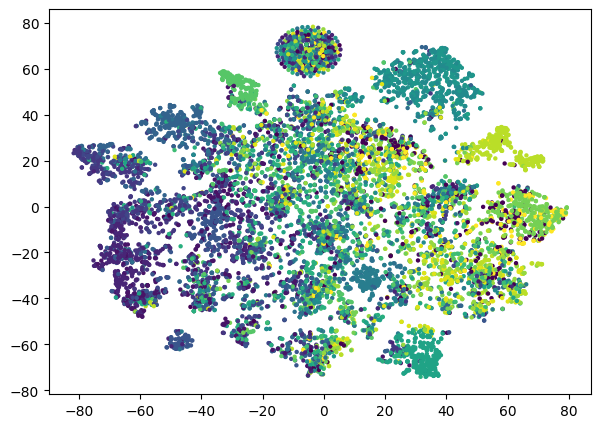

In [31]:
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()

Setiap titik mempresentasikan tiap dokumen, sedangkan warna mempresentasikan 20 kelompok berita. Dari visualisasi, dapat dikatakan bahwa topic modeling yang dilakukan cukup baik karena dapat dilihat cukup banyak titik-titik yang berkumpul memiliki warna yang sama. Hal ini berarti dokumen-dokumen tersebut termasuk dalam kelompok berita yang sama.